# **Computer Vision Workshop** - CIFAR10 Classification - PART I

![alt](https://kibernetika.ai/wp-content/uploads/2018/11/CIFAR-10.png)

## I. <ins>Introduction</ins>

Welcome to this Google Colaboratory (Colab) Jupyter Notebook, where you will learn how to leverage the powerful TensorFlow library for image classification on the CIFAR-10 dataset. This is an interactive learning experience where you'll build and progressively improve a deep learning model, step by step.

This is the **1/2 notebook**, it has been split into two contiguous notebooks for the sake of readability.

The primary objective of this notebook is to serve as a guide, providing you with a comprehensive example to follow. As this is the initial notebook you'll be navigating through, it's designed to illustrate the process in detail.

**Feel free to modify and experiment with the given code !**

There also are

<details open>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  > sections which can give you an idea of what you could try, with the difficulity in ⭐
</details>

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. The classes include objects such as cars, birds, cats, dogs, and more.

**I hope you like it 😀 and that it gives you the necessary tools to compete in the Kaggle contest !**

Let's get started !

If you have any questions regarding this notebook, add me on Discord : **OrdinaryDev83#9338**

## II. <ins>Google Colab Tutorial</ins>

Google Colab (short for Collaboratory) is a cloud-based Jupyter notebook environment provided by Google. It allows you to run and write code in Python directly in your web browser without requiring any local setup. Colab provides free access to GPUs, making it particularly useful for machine learning and deep learning tasks.

### Step 1: Duplicate the notebook so you can modify it

Before doing anything, press this button
> ![Copier Sur Drive](https://i.imgur.com/VYlJSL8.png)

A new tab will appear, this notebook has been copied to your Google Drive, you can now access it from there.

You need to be able to see
> ![Toutes les modifications ont été enregistrées](https://i.imgur.com/1UvF3Yn.png)

### Step 2: Writing and Running Code

You can write and run code cells within the notebook. Each cell can contain either code or text (MarkDown). To add a new cell, click on the "+" button on the toolbar above the notebook or between cells when hovering with your cursor.

In a code cell, you can write and execute Python code. To run a code cell, click on the play button ▶️ on the left side of the cell or use the keyboard shortcut "Shift+Enter". The code will be executed, and the output (if any) will be displayed below the cell. The notebook will always display all the prints you could have and the value of variable of the last line in the cell.
> ![l](https://i.imgur.com/p9zJQ5A.png)

### Step 3: Using GPU

Colab provides free access to GPUs, which can significantly accelerate deep learning tasks. To enable GPU or TPU acceleration, click on "Runtime" in the Colab menu and select "Change runtime type". In the dialog box, choose "GPU"  from the "Hardware accelerator" dropdown menu and click "Save". Colab will restart the runtime and allocate the selected accelerator.
![k](https://images.deepai.org/converted-papers/1802.04799/x1.png)

### Step 4: Installing Packages and Libraries

Colab comes with many popular Python packages pre-installed. However, if you need to install additional packages, you can use the "!pip install" command within a code cell. For example, to install the NumPy package, you can run the following command: (in this notebook you don't need to install anything)

```python
!pip install numpy
```

### Step 5: Exiting and Clearing Session

To exit a Colab notebook, you can simply close the browser tab. Colab automatically saves the notebook's state, so when you reopen it, you can continue from where you left off.

If you want to clear the output and reset the runtime, click on "Runtime" in the Colab menu and select "Restart runtime". This will clear all variables and reset the notebook's state.

That's it! You now have a basic understanding of Google Colab and its key features. You can explore further by working on your own projects, leveraging the provided GPU resources, and experimenting with different libraries and frameworks available in the Colab environment.

Happy coding!

## III. <ins>Setting up the environment</ins>

### A. Installing required libraries and tools

**Colab GPU Dependencies**

Installation of necessary packages to allow GPU processing.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils, applications
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

For reproductibility purposes we need to set the seed, but it's noteworthy that this gives no deterministic behavior

In [2]:
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# Check if the GPU is available
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### B. Loading and exploring the CIFAR-10 dataset

There are many ways to import the data.
Usually, for any type of dataset you would have to :


*   Import the dataset as Numpy arrays, CSVs...
*   Clean the dataset using Pandas, Sklearn...
*   Only keep the features or data your need
*   Convert it to `tf.data.Dataset` using `tf.data.Dataset.from_tensor_slices`


Here we use the handy `tensorflow_datasets` library function `load` which gives us directly the `tf.data.Dataset` dictionary (train, test) and information on the data (info) for the dataset we need.

In [4]:
# Load and explore the CIFAR-10 datase
# load : https://www.tensorflow.org/datasets/api_docs/python/tfds/load
# tensorflow_dataset cifar10 : https://www.tensorflow.org/datasets/catalog/cifar10?hl=fr

ds_dict, ds_info = tfds.load('cifar10', as_supervised=False, with_info=True)

class_names = ds_info.features['label'].names
n_classes = len(class_names)

ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHW9U23/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteHW9U23/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path=PosixGPath('/tmp/tmpq84f5o4_tfds'),
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning mul

<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  **⭐⭐⭐Experiment with different TensorFlow datasets** : Explore other datasets available in the TensorFlow Datasets catalog. Load and examine datasets that interest you. Don't forget to change the extracted features and image resolution accordingly after your change !
</details>

As you can see this TensorFlow dataset has the following feature dictionary for each piece of data :
```
FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})
```
![d](https://i.imgur.com/1C25H9U.png)

### C. Splitting the data into training, validation, and testing sets

Let's create two `tf.data.Dataset` instances from the dictionary.

In [5]:
ds_train, ds_test = ds_dict["train"], ds_dict["test"]

It's common practice to have a validation dataset for the following reasons :

1. **Hyperparameter tuning and model selection**: During the process of training a machine learning model, you often need to make decisions about the model's structure (e.g., the number of layers in a neural network, the number of units in each layer) and the settings of the model's parameters (e.g., learning rate, regularization strength). The validation set provides a unbiased evaluation for model selection and for fine-tuning these hyperparameters.

2. **Prevent Overfitting**: Overfitting occurs when the model learns the training data too well, to the point where it is unable to generalize to new, unseen data. By using a validation set, you can monitor the model's performance on unseen data during training and stop training (early stopping) when the validation error starts to increase. This helps to ensure that the model generalizes well and does not merely memorize the training data.

3. **Estimate of Test Performance**: The validation set provides an estimate of the model's performance on an independent dataset and can help diagnose different types of errors (bias/variance trade-off). For instance, if the model performs well on the training set but poorly on the validation set, this is a sign of overfitting (high variance). Conversely, if it performs poorly on both, this is a sign of underfitting (high bias).

![k](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4158089%2Fb9fc1dc41a63e901b705e00201cefacf%2FWorkflowWithValidationSet.svg?generation=1586979357140761&alt=media)

Let's extract some of the test data to build it.

In [6]:
# Split the data into training, validation, and testing sets
# tf.data.Dataset : https://www.tensorflow.org/api_docs/python/tf/data/Dataset

nb_examples_test = ds_info.splits["test"].num_examples
nb_examples_validation = int(nb_examples_test * 0.1)

ds_validation = ds_test.take(nb_examples_validation)
ds_test = ds_test.skip(nb_examples_validation)

<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  **⭐Experiment with different validation percentages** : even though the validation has to stay low to learn as much information as possible while training, you can try other percentages.
</details>

## IV. <ins>Preprocessing the data</ins>

### A. Shaping the data

`tf.data.Dataset` allows us to `map` a function over the whole data.


1.   Extract data from it in order to have `image` as X and `label` as Y
2.   Cast the images to `float32`, and the label to `int` with we one_hot encode
> ![d](https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png)

Then we will batch the dataset into sub parts (batchs) of size `batch_size` so we only have to load in memory the current batch we need for each current epoch step.



In [7]:
def shape(x):
  """
  Extracts the dictionary into a tuple X, Y
  """
  return x['image'], x['label']

img_size = 32

def preprocess(img, label):
    # good practice, but it's already 32x32 for each image
    # img = tf.image.resize(img, [img_size, img_size])
    img = tf.cast(img, dtype=tf.float32)
    
    # one_hot encoding of the label
    # ex : class 2 of 3 => [0, 1, 0] or class 0 of 3 => [1, 0, 0]
    # this avoid creating a relationship between classes
    # "wrongly classifying a dog as a car is as bad as if it was a plane"
    # https://www.tensorflow.org/api_docs/python/tf/one_hot
    return img, tf.one_hot(int(label), n_classes)

batch_size = 256

# applies the preprocessing functions to the images and labels, shuffles the data,
# batches it for training, and prefetches it for optimal performance
def preprocess_dataset(ds):
    ds = ds.map(shape, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)

    ds = ds.shuffle(len(ds)) # randomly shuffle

    # puts everything into memory for faster training
    # (bad idea on large datasets)
    # can get you a OEM error or crash the notebook
    # comment the line if a OEM error occurs
    ds = ds.cache()

    ds = ds.batch(batch_size)

    ds = ds.prefetch(1) # preload the next batch (faster)

    return ds

# apply it on each dataset we have
ds_train = preprocess_dataset(ds_train)
ds_validation = preprocess_dataset(ds_validation)
ds_test = preprocess_dataset(ds_test)

<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  1. **⭐Experiment with different batch sizes**: Adjust the `batch_size` parameter and observe its impact on training performance and memory usage. Explore larger and smaller batch sizes to find an optimal balance between training efficiency and memory requirements.

  2. **⭐Evaluate dataset caching**: Uncomment the `ds.cache()` line to cache the dataset in memory. Measure the effect of this caching technique on training time and resource usage. Assess whether the dataset size allows for efficient caching or if it results in increased memory consumption.

  3. **⭐Experiment image size**: the dataset provides 32x32 images, but you can try to upscale them by uncommenting `img = tf.image.resize(img, [32, 32])` and changing `img_size = 32`.
</details>

### B. Normalizing the data

As explained in the conference, here are a few reasons why it's usually beneficial:

1. **Improving Numerical Stability**: Many machine learning algorithms use numerical optimization techniques that can be sensitive to the scale of the features. If features have very large or very small values or are on different scales, the optimization might become unstable or slow.

2. **Faster Convergence During Training**: When features are on similar scales, gradient descent (the algorithm used to find the minimum of the loss function in models like neural networks) tends to converge more quickly. This is because if one feature has a range of 0 to 1 and another has a range of 0 to 1,000,000, the gradients will update the weights of the second feature much more slowly.

3. **Preventing Dominance of Features**: If you have features with differing scales, some features might dominate others in certain machine learning models, which can be problematic. For example, in models that use a distance metric, like k-nearest neighbors (KNN) or support vector machines (SVM) (not our case here), a feature with a large scale can dominate the distance calculations, causing the model to mostly pay attention to that feature.

![d](https://camo.githubusercontent.com/1f4da8632894c7220f804bcddc6e50bc708e6481/68747470733a2f2f692e696d6775722e636f6d2f32784e423261552e6a7067)

In [8]:
# Normalize the data

def normalize(img, label):
  img = tf.cast(img / 255.0, dtype=tf.float32)
  return img, label

ds_train = ds_train.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
ds_validation = ds_validation.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

Let's display some images from the train dataset.

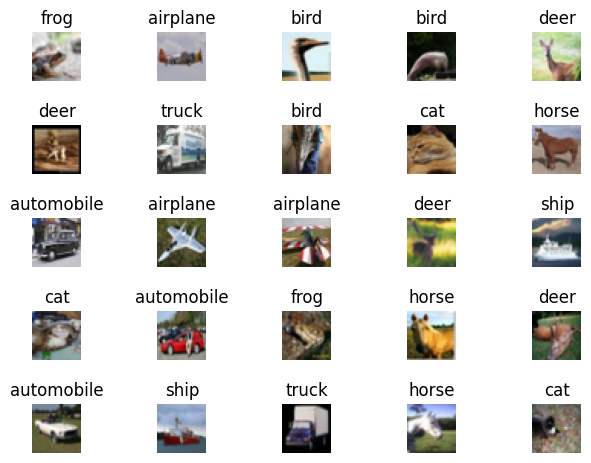

In [9]:
def visualize_examples():
  one_batch = ds_train.take(1)
  grid_size = 5
  fig, axs = plt.subplots(grid_size, grid_size)
  fig.tight_layout()

  for images, labels in one_batch:
    for i, data in enumerate(zip(images, labels)):
      if i >= grid_size * grid_size:
        break
      image, label = data
      axs[i // grid_size, i % grid_size].imshow(image, cmap="gray")
      axs[i // grid_size, i % grid_size].set_title(class_names[np.argmax(label)])
      axs[i // grid_size, i % grid_size].set_axis_off()
    break
  plt.show()

visualize_examples()

## V. <ins>Building the basic model</ins>

### A. Introduction to neural networks
As explained in the conference, Neural networks are a class of machine learning models inspired by the human brain. They are composed of interconnected nodes, or "neurons", and can learn to perform complex tasks given enough training data and computational resources.

In the context of machine learning, a neural network takes in inputs, processes them through hidden layers using weights that are adjusted during training, and outputs a prediction. This process is known as *forward propagation* (utilized in feed-forward networks). During training, the output of the neural network is compared to the actual target, and the weights are adjusted to minimize the difference between the predicted and actual target. This process is known as backpropagation.

> If you would like to watch a great videos explanining this topic :
https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

![d](https://www.researchgate.net/publication/312205163/figure/fig1/AS:453658144972800@1485171938968/a-The-building-block-of-deep-neural-networks-artificial-neuron-or-node-Each-input-x.png)

![k](https://miro.medium.com/v2/resize:fit:1400/1*ZXAOUqmlyECgfVa81Sr6Ew.png)

### B. Creating a simple feedforward neural network


This code defines a simple feedforward neural network model. Here's a breakdown of what the code does:

1. `tf.keras.Sequential`: This is a wrapper for a neural network model that treats the model as a sequence of layers. It simplifies the process of building a model by allowing you to just add one layer at a time.

2. `layers.Input(shape=(img_size, img_size, 3))`: This is the input layer of the model. It doesn't do any processing; it's just there to specify the shape of the input data. The shape `(img_size, img_size, 3)` implies that the model expects input images to be `img_size` by `img_size` in size, with 3 color channels (Red, Green, and Blue).

3. `layers.Flatten()`: This layer flattens the input data, i.e., it converts a multi-dimensional tensor into a 1-dimensional tensor (vector). It's necessary because the next layer (a Dense layer) expects its input to be a vector.

4. `layers.Dense(128, activation='relu')`: This is a fully connected (Dense) layer with 128 neurons. The activation function is the Rectified Linear Unit (ReLU). It's a common choice for hidden layers in a neural network, as it helps the network learn complex patterns effectively.

5. `layers.Dense(n_classes, activation='softmax')`: This is the output layer of the network. It has `n_classes` neurons, where `n_classes` is the number of classes the model is trying to predict. The activation function is softmax, which is common for multi-class classification problems. It outputs a probability distribution over the classes, i.e., it makes the output sum to 1 so the output can be interpreted as probabilities.

In [10]:
# Build a simple feedforward neural network
# tf.keras.Sequential allows you to stack TF layers easily
model = tf.keras.Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

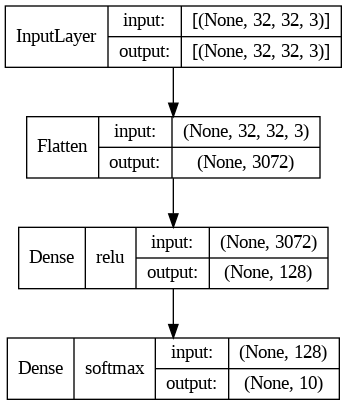

In [11]:
# plot model
def plot_model_architecture(model):
  tf.keras.utils.plot_model(
    model,
    to_file="my_model.png",
    show_shapes=True,
    show_layer_names=False,
    show_layer_activations=True
  )
  display(Image(filename='my_model.png'))

plot_model_architecture(model)

<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  1. **⭐Adjust the number of hidden layers**: Experiment with adding more hidden layers to the network. You can increase the depth of the network by adding additional `layers.Dense` layers. Observe the impact on the model's performance and training time. Be cautious not to make the network too deep, as it may lead to overfitting. (as the number of parameters is directly correlated to overfitting)

  2. **⭐Vary the number of neurons in hidden layers**: Modify the number of neurons in the hidden layers. Try increasing or decreasing the number of neurons in the `layers.Dense` layers and observe the effect on the model's capacity to learn and generalize. (overfitting /!\ )

  3. **⭐Experiment with different activation functions**: Explore different activation functions for the hidden layers, such as `sigmoid` or `tanh`, instead of using `relu`. (https://www.tensorflow.org/api_docs/python/tf/keras/activations) Observe how different activation functions affect the model's learning behavior and performance.

  4. **⭐⭐Introduce regularization techniques**: Implement regularization techniques like L1 or L2 regularization by adding `kernel_regularizer` or `bias_regularizer` arguments to the `layers.Dense` layers. Observe how regularization affects the model's ability to generalize and handle overfitting.
</details>

In the next iterations we will try to improve the model, as it is basic at the moment.

### C. Compiling and training the model

This code block is performing two important tasks: compiling the model and then summarizing the model.

1. `model.compile()`: This function configures the model for training. It takes three key arguments:

   - `optimizer`: This is the optimization algorithm that the model will use to update its weights. In this case, it's using Adam (Adaptive Moment Estimation), a popular gradient descent-based optimization algorithm that adjusts the learning rate adaptively for each weight.
   > ![d](https://i.imgur.com/BZJBS5d.png)

   - `loss`: This is the loss function that the model will try to minimize during training. The model is using CategoricalCrossentropy, which is suitable for multi-class classification tasks where the labels are integers (if the labels were not one-hot encoded, you would use SparseCategoricalCrossentropy instead).

   - `metrics`: These are the metrics that the model will track during training and testing. In this case, it's tracking accuracy, which is a common metric for classification tasks. Accuracy is the proportion of correct predictions out of total predictions.
   > ![d](https://pbs.twimg.com/media/FD2hTDOX0AIdRti.jpg)

2. `model.summary()`: This function prints a summary of the model. The summary includes the types of layers in the model, the output shapes of each layer, and the number of parameters (weights) in each layer. It also shows the total number of parameters in the model, and how many of them are trainable and non-trainable. This is useful for getting a high-level overview of the model's architecture and size.

In [12]:
# Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  1. **⭐Try different optimizers**: Experiment with different optimizers available in TensorFlow, such as `SGD`, `RMSprop`, or `Adam` (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Modify the optimizer in the model's compilation step (`model.compile(...)`) and observe the impact on the training speed and final performance of the model. Also try to tweak their parameters !

  2. **⭐Modify the learning rate**: Adjust the learning rate of the optimizer. Try different values, such as increasing or decreasing the learning rate, and observe the effect on the model's convergence and performance. You can set the learning rate by configuring the optimizer with the `learning_rate` parameter.
</details>

This code block is used to train the model using the `model.fit()` function. Here's a detailed explanation:

1. `history = model.fit()`: This function is responsible for training the model for a specified number of epochs (iterations over the entire dataset). The function returns a `History` object, which is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values.

2. The parameters for `model.fit()` are:

   - `ds_train`: This is the training dataset that the model will learn from. It is expected to be a `tf.data.Dataset` object that yields batches of inputs and targets.

   - `batch_size`: This is the number of samples to work through before updating the internal model parameters. It's the number of images that the model "sees" at once during training. It's typically set as a power of 2 (like 32 or 64) that fits within the memory limit of your GPU.

   - `epochs=5`: This is the number of times the learning algorithm will work through the entire training dataset. One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is a measure of the number of times all of the training vectors are used once to update the weights.

   - `validation_data=ds_validation`: This is the data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. This is a `tf.data.Dataset` object.

In [13]:
history = model.fit(
  ds_train,
  batch_size=batch_size,
  epochs=5,
  validation_data=ds_validation,
)

Epoch 1/5
196/196 [==============================] - 9s 7ms/step - loss: 2.0084 - accuracy: 0.2885 - val_loss: 1.7830 - val_accuracy: 0.3760
Epoch 2/5
196/196 [==============================] - 1s 5ms/step - loss: 1.8043 - accuracy: 0.3635 - val_loss: 1.6887 - val_accuracy: 0.4080
Epoch 3/5
196/196 [==============================] - 1s 5ms/step - loss: 1.7428 - accuracy: 0.3869 - val_loss: 1.6429 - val_accuracy: 0.4210
Epoch 4/5
196/196 [==============================] - 1s 5ms/step - loss: 1.6987 - accuracy: 0.4025 - val_loss: 1.6124 - val_accuracy: 0.4220
Epoch 5/5
196/196 [==============================] - 1s 6ms/step - loss: 1.6664 - accuracy: 0.4138 - val_loss: 1.5991 - val_accuracy: 0.4400


<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  1. **⭐⭐Implement early stopping**: Add an early stopping mechanism to prevent overfitting and improve training efficiency. Use the `tf.keras.callbacks.EarlyStopping` callback to monitor a specific metric, such as validation loss, and stop the training when the metric stops improving for a certain number of epochs.

  2. **⭐⭐Implement a learning rate reduction strategy**: Use the `tf.keras.callbacks.ReduceLROnPlateau` callback. This callback dynamically adjusts the learning rate during training when a monitored metric (e.g., validation loss) stops improving. Reducing the learning rate can help the model converge more effectively and potentially achieve better performance.

  To add the callbacks to the `fit` method, add a parameter `callbacks=list_of_your_callbacks`
  
  > Complete list of all callbacks : https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
</details>

In the next step, we will create plots of the accuracy and loss during training. These plots are called learning curves. They provide a visual representation of how the model's learning is progressing.

The y-axis on an accuracy plot is accuracy, while on a loss plot it is loss. The x-axis on both plots is the number of epochs. 

1. **Accuracy curves**: These plots will show us how the accuracy of our model on the training and validation datasets evolves during training. The training accuracy curve is expected to increase over time. The validation accuracy curve might also increase over time, but there will typically be a point after which it will plateau or even start decreasing. This point indicates where the model has learned to generalize well from the training data and any further training is causing the model to *overfit* to the training data.

2. **Loss curves**: These plots will show us how the loss (categorical cross entropy) of our model on the training and validation datasets evolves during training. The training loss curve is expected to decrease over time. The validation loss curve might also decrease over time, but there will typically be a point after which it will plateau or even start increasing (just like the accuracy).

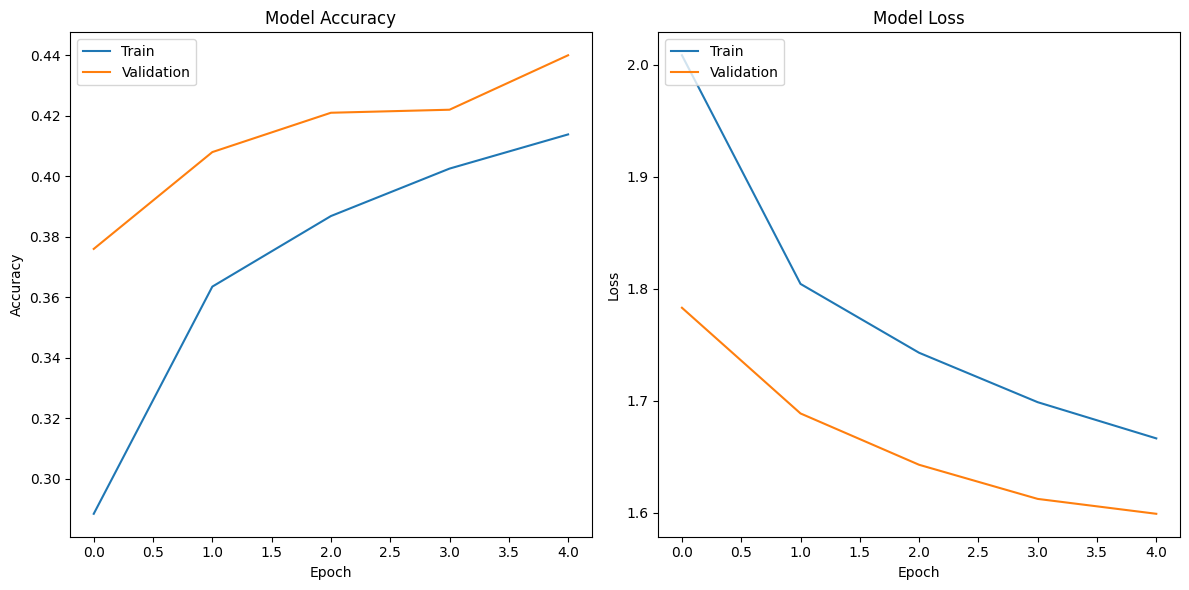

In [14]:
def plot_history(history):
  # Plotting accuracy
  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  # Plotting loss
  plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.tight_layout()  # Adjusts subplot params so that subplots don't overlap
  plt.show()

plot_history(history)

### D. Evaluating the model on the test dataset

This code block evaluates the model on the test dataset and prints the resulting accuracy. This gives you an unbiased estimate of how well the model is expected to perform on new, unseen data, since the test set was not used at all during the training process.

In [15]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(ds_test, verbose=2)
print('\nTest accuracy:', round(test_acc, 4))

36/36 - 2s - loss: 1.6480 - accuracy: 0.4154 - 2s/epoch - 49ms/step

Test accuracy: 0.4154


## VI. <ins>Improving the model with Convolutional Neural Networks (CNNs)</ins>

### A. Introduction to convolutions and feature extraction

A Conv2D layer performs a 2D convolution operation. In the context of a CNN, this means that it applies a series of filters (also known as kernels) to the input data (recall the conference). Each filter is a small square matrix of weights which is slid over the input image, from left to right, top to bottom, taking a dot product of the filter and the section of the image it's currently on at each step. This results in a 2D activation map that gives the responses of that filter at every spatial position.

![d](https://mlnotebook.github.io/img/CNN/convSobel.gif)

This operation has several benefits:

1. **Feature Learning**: Each filter can learn to detect a specific feature in the input data. For example, in an image, early layers might learn to detect edges or colors, while deeper layers might detect more complex patterns like shapes or objects. 

2. **Spatial Invariance**: Because the same filter is applied across the entire image, the model can recognize the same pattern anywhere in the image. This means the model has translation invariance, i.e., it can recognize objects no matter where they are located in the image.

3. **Parameter Efficiency**: Convolutional layers require fewer parameters than fully connected layers, which makes the network more efficient and reduces the risk of overfitting.

In the next step, by adding a Conv2D layer to our model, we'll be upgrading our architecture from a simple feed-forward network to a more powerful convolutional network. This should help the model learn more complex patterns in the data and improve its performance.

### B. Adding convolutional layers to the model
```python
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    ...
)

```
Example :
```python
tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
```

### C. Adding maximum pooling layers to reduce dimensionality

Pooling layers are another key component of Convolutional Neural Networks (CNNs). They are typically used immediately after convolutional layers.

Pooling layers perform a down-sampling operation along the spatial dimensions (width, height) of the input data. The most common type of pooling is max pooling, which extracts the maximum value in each patch of the input data according to the kernel size of the pooling layer. 

There are several reasons why pooling layers are used:

1. **Dimensionality Reduction**: By down-sampling the input data, pooling layers significantly reduce the spatial dimensions (width, height) of the data, which leads to a reduction in the amount of parameters and computation in the network. This makes the network more efficient.

2. **Invariance to Small Translations**: Pooling layers provide a form of translation invariance. That means that if the input image is slightly shifted or translated, the values of most of the pooled features do not change. This makes the model more robust to variations in the position of features in the input data.

3. **Feature Extraction**: By taking the maximum value in each patch of the input, max pooling effectively acts as a feature detector, picking out the most important features from the input data.

When stacking two convolutional layers in a convolutional neural network (CNN), there are a few general rules to consider regarding the stride, padding, and kernel size:

1. **Stride**: The stride determines the step size of the convolutional filter as it moves across the input. In general, it is recommended to use a stride of 1 for the convolutional layers within the network. A stride of 1 preserves spatial information and allows the filters to scan the input more comprehensively. Larger strides, such as 2 or more, reduce the spatial dimensions of the output and can lead to loss of fine-grained details.

2. **Padding**: Padding is the addition of extra border pixels around the input image to ensure that the spatial dimensions of the output remain the same as the input. There are two types of padding: "same" and "valid". 
   - "Same" padding adds zeros to the input image so that the output feature map has the same spatial dimensions as the input. It helps in preserving spatial information and is often used to avoid reduction in feature map size.
   - "Valid" padding means no padding is added, and the output feature map size will be smaller than the input size. This can result in a progressive reduction of spatial dimensions throughout the network.

3. **Kernel Size**: The kernel size, also known as the filter size, determines the receptive field of each convolutional layer. It specifies the dimensions of the sliding window that moves across the input. Common kernel sizes are 3x3, 5x5, and 7x7. Smaller kernel sizes allow the network to capture local features, while larger kernel sizes enable the network to capture more global features. In practice, smaller kernel sizes are often preferred due to their computational efficiency and ability to capture fine-grained details.

In the next step, by adding a pooling layer after our Conv2D layer, we are aiming to both reduce the dimensionality of our data (making subsequent layers more computationally efficient) and to make our model more robust to small translations and variations in the input data.

```python
tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding="valid",
    ...
)
```
Example :
```python
tf.keras.layers.MaxPooling2D((2, 2))
```

### D. Retraining and evaluating the updated model


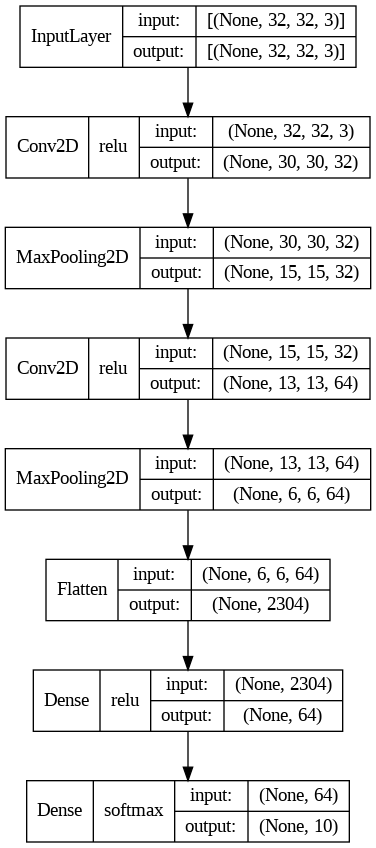

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [16]:
cnn_model = models.Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

plot_model_architecture(cnn_model)

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
cnn_model.summary()

history = cnn_model.fit(ds_train, epochs=5, validation_data=ds_validation)

<details>
  <summary><h3>🔎 <ins>To Go Further<ins/><h3/></summary>

  1. **⭐Change the number of filters**: Experiment with changing the number of filters in the `Conv2D` layers. Increase or decrease the number of filters and observe the impact on the model's performance and training time. More filters can potentially capture more complex patterns, while fewer filters may simplify the model and reduce computational overhead.

  2. **⭐Adjust the kernel size**: Modify the kernel size in the `Conv2D` layers. Try different kernel sizes, such as $(5, 5)$ or $(7, 7)$, and evaluate their effect on the model's ability to capture different spatial features in the images.

  3. **⭐⭐Add more convolutional layers**: Extend the model's depth by adding additional `Conv2D` layers. Experiment with inserting one or more extra convolutional layers, followed by pooling layers, and observe the impact on the model's performance. Be cautious not to make the model too deep, as it may lead to overfitting.
  <blockquote>
  When stacking two convolutional layers (Conv $n$ and Conv $n+1$), the general rule for maintaining the spatial dimensions is as follows:

    - If Conv $n$ has "same" padding, a stride of 1, and a kernel size of $K$, Conv $n+1$ should also have a stride of 1 and a kernel size of $K$ to preserve the spatial dimensions of the output feature maps.

    - If Conv $n$ has "valid" padding, the output feature map size will be reduced. Conv $n+1$ can have either "same" or "valid" padding, depending on whether you want to maintain the reduced spatial dimensions or further reduce them.
  <blockquote/>

  4. **⭐Change the activation function**: Explore different activation functions for the convolutional and dense layers. Consider using activation functions like `sigmoid` or `tanh` instead of `relu`. Observe how different activation functions influence the model's learning behavior and performance.

  5. **⭐⭐Add regularization**: Implement regularization techniques such as L2 regularization to mitigate overfitting. Add `layers.Regularization` layers to the model and evaluate their effect on the model's ability to generalize and prevent overfitting.
</details>

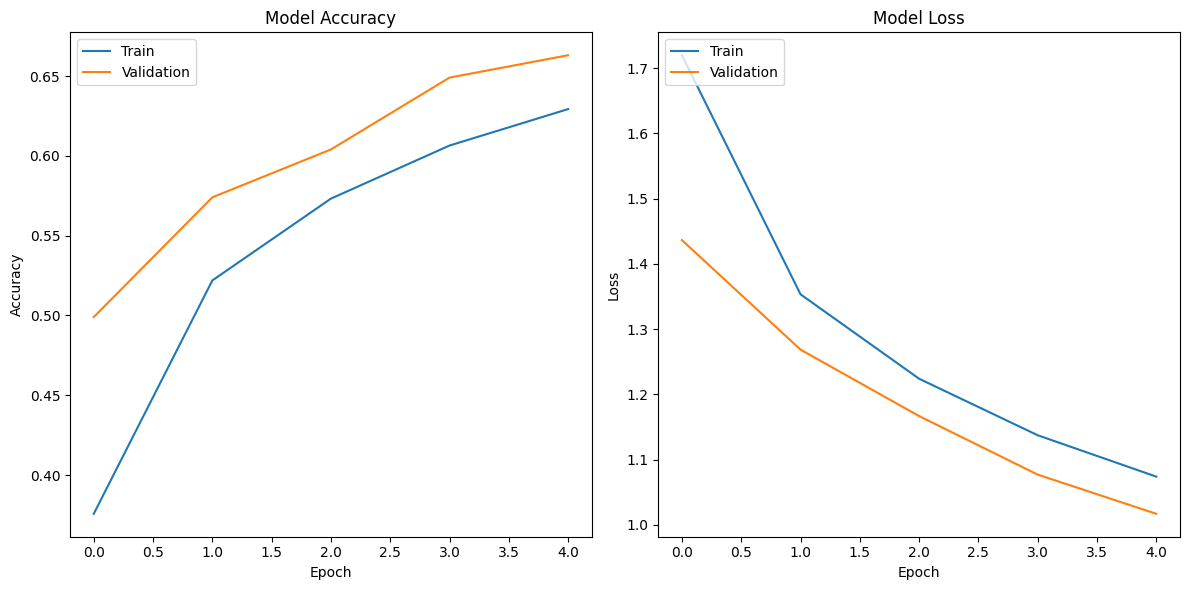

In [17]:
plot_history(history)

In [18]:
test_loss, test_acc = cnn_model.evaluate(ds_test, verbose=2)
print('\nTest accuracy:', round(test_acc, 4))

36/36 - 0s - loss: 1.0656 - accuracy: 0.6260 - 330ms/epoch - 9ms/step

Test accuracy: 0.626


We can see the model's accuracy and loss have grealty improved.

## VII. <ins>Next Part</ins>

In the upcoming segment of our exploration, we aim to upgrade the model's ability to generalize more effectively by utilizing the technique of data augmentation. This process will serve to increase the diversity of our data set, thus enhancing the model's ability to make accurate predictions in varied scenarios.

Additionally, we will be exploring two vital pillars of Deep Learning, namely transfer learning and fine-tuning. Transfer learning refers to the practice of utilizing pre-trained models on a new problem, capitalizing on the knowledge gained during the initial training phase to streamline the learning process. Fine-tuning, on the other hand, involves the subtle adjustment of these pre-trained models to better suit our specific task, thereby optimizing their performance. These two methodologies will be instrumental in our pursuit of a highly efficient and effective Deep Learning model/

See you in the next part !

Tom

----

Created by Tom Genlis - EPITA 2024 - SCIA - CV

- GitHub : [OrdinaryDev83](https://github.com/OrdinaryDev83)
- Mail : tom.genlis@gmail.com
- Discord : OrdinaryDev83#9338
- LinkedIn : [Tom Genlis](https://www.linkedin.com/in/tom-genlis/)